### Creating A Stacked Bar Chart

In [ ]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

We have 12 different CSV files containing crime data for each month of 2020. We can use the `glob` module to find all files matching a pattern.

In [ ]:
data_pkg_path = 'data'
folder = 'crime'
file_pattern = '2020-*.csv'
file_path_pattern = os.path.join(data_pkg_path, folder, file_pattern)

dataframe_list = [pd.read_csv(f) for f in glob.glob(file_path_pattern)]
merged_df = pd.concat(dataframe_list)

We want to chart a stacked chart with information about crime type in each bar. 

In [ ]:
counts_by_type = merged_df.groupby(['Month', 'Crime type']).size()
counts_by_type

Month    Crime type                  
2020-01  Anti-social behaviour           17548
         Bicycle theft                    1172
         Burglary                         6889
         Criminal damage and arson        4374
         Drugs                            4282
                                         ...  
2020-12  Robbery                          2021
         Shoplifting                      2690
         Theft from the person            3075
         Vehicle crime                    7758
         Violence and sexual offences    17836
Length: 168, dtype: int64

The result is not in a suitable format for plotting. We call `unstack()` to create a dataframe. 

In [ ]:
counts_df = counts_by_type.unstack()
counts_df

Now we can create the stacked bar chart. Instead of the default legend, we create a horizontal legend with a frame using the `legend()` function.

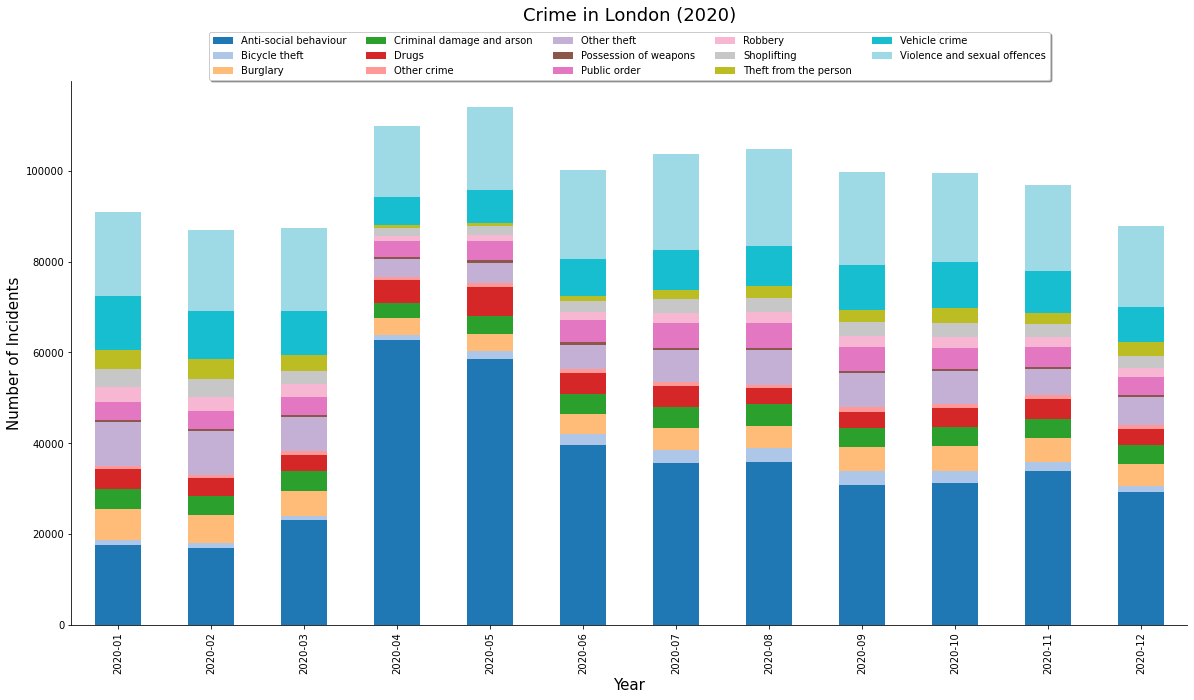

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20,10)
counts_df.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
plt.legend(loc='upper center', ncol=5, frameon=True, bbox_to_anchor=(0.5, 1.1), fancybox=True, shadow=True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Year', size = 15)
plt.ylabel('Number of Incidents', size = 15)
plt.title('Crime in London (2020)', size = 18, y=1.1)
output_folder = 'output'
output_path = os.path.join(output_folder, 'stacked_chart.jpg')
plt.savefig(output_path)
plt.show()